In [122]:
import pickle

In [123]:
import os

In [124]:
os.getcwd()

'/lustre/work/statgrads/vpiyush2/DeepCDR_MEnKF-ANN'

In [125]:
# DeepCDR_MEnKF-ANN/DeepCDR_MEnKF-ANN_all_drugs_all_omics

In [126]:
with open('DeepCDR_MEnKF-ANN_all_drugs_all_omics/Real_World_EnKF_DeepCDR_Neurons_16_Gamma_500_var_weights_1_num_ens_801.pkl', 'rb') as f:
    deepcdr= pickle.load(f)  

In [127]:
import matplotlib.pyplot as plt

In [128]:
cur_idx = 9

In [129]:
import numpy as np

In [130]:
deepcdr[cur_idx-1]

(2.294810149577808,
 1.767547521123201,
 0.82,
 5.0788325023530545,
 0.83,
 4.873728513558338,
 0.4931158540460824,
 6,
 5.716666666666667,
 array([[[2.32563055],
         [2.3627501 ],
         [2.06029182],
         ...,
         [3.96859502],
         [1.65296844],
         [2.35600372]],
 
        [[2.03829204],
         [2.65998519],
         [1.85882207],
         ...,
         [1.07737825],
         [2.96039396],
         [3.70894814]],
 
        [[3.63185428],
         [3.83111591],
         [3.52890273],
         ...,
         [1.0806246 ],
         [0.01729115],
         [0.52616106]],
 
        ...,
 
        [[2.76717702],
         [2.91201916],
         [2.52679603],
         ...,
         [3.34237094],
         [3.49210424],
         [3.86753973]],
 
        [[1.42850311],
         [1.43433835],
         [1.15551386],
         ...,
         [2.4871258 ],
         [2.39365824],
         [2.71058067]],
 
        [[3.76194537],
         [3.86016047],
         [3.7560757 ],
 

In [229]:
# path = r"/lustre/work/statgrads/vpiyush2/enkf_simulations/Old_Strategy_EnKF_LSTM_Doc2Vec_Simulations/DeepCDR/dataset_" + str(cur_idx) + "/"

## read in all the labels 
## for train test and valid
# y_train = np.load(path + "//" + "train_y.npy")
# y_valid = np.load(path + "//" + "valid_y.npy")
y_test = np.load('DeepCDR_MEnKF-ANN_all_drugs_all_omics/dataset_' + str(cur_idx) + "//" + "test_y.npy")
    

In [248]:
# y_test

In [249]:
from sklearn.metrics import mean_squared_error

In [274]:
import seaborn as sns
import random

In [275]:
idx = np.sort(random.sample(range(0, y_test.shape[0]), k = 7))

In [276]:
idx

array([26, 33, 44, 62, 67, 84, 98])

In [277]:
to_compare = y_test.reshape(-1,1)[idx,:]

In [278]:
import pandas as pd

In [279]:
catch = []
for i in idx: 
    preds = deepcdr[cur_idx-1][-1][:,i,:]
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ["EnKF_Preds"]
    preds_df["idx"] = i
    catch.append(preds_df)

In [280]:
all_df = pd.concat(catch)

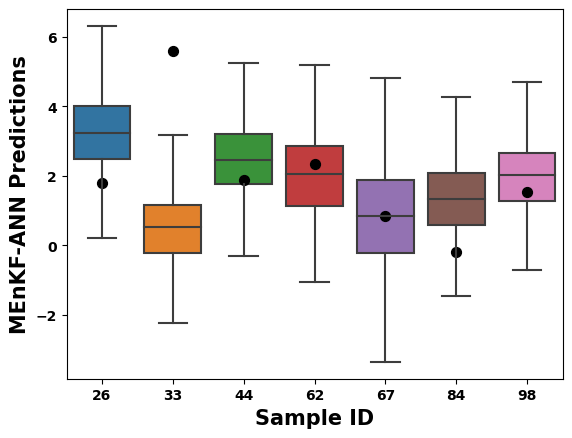

In [281]:
sns.boxplot(data=all_df, x="idx", y="EnKF_Preds", showfliers = False)
plt.scatter(range(0, len(idx)), to_compare, s = 50, c = "black")
plt.xlabel("Sample ID", fontweight = "bold", fontsize = 15)
plt.ylabel("MEnKF-ANN Predictions", fontweight = "bold", fontsize = 15)
plt.xticks(fontweight = "bold", fontsize = 10)
plt.yticks(fontweight = "bold", fontsize = 10)
plt.show()